# Pipeline

## Imports

In [1]:
import os
import numpy
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths
from scipy.interpolate import interp1d

## Load data

- Extract mean grey values
- Extract std. dev. of grey values

In [2]:
# Dirpath as input
data_dir = 'data/raw/2024-05-17_E8-0/E4/precut/'
csv_file = '240517_GCaMP_E8.0_Exp3_E4_x20_320cyc_precut_mid._t3_ls10_stage-1-30.58.csv'

# Cut state
cut = data_dir.split('/')[-2]

# Decinal places
dp = 2

# Define name of dir for all outputs
output_dir = data_dir.replace('raw', 'processed')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_dir

'data/processed/2024-05-17_E8-0/E4/precut/'

In [3]:
raw_data = pd.read_csv(data_dir + csv_file, index_col=0)
raw_data

,Area(LL),Mean(LL),StdDev(LL),Mode(LL),Min(LL),Max(LL),Median(LL),Area(LI),Mean(LI),StdDev(LI),...,Min(RI),Max(RI),Median(RI),Area(RL),Mean(RL),StdDev(RL),Mode(RL),Min(RL),Max(RL),Median(RL)
,,,,,,,,,,,,,,,,,,,,,
1,112.546,46.175,10.089,46,28,73,46,112.546,23.237,5.225,...,28,107,52,112.546,62.450,10.040,65,40,86,62
2,112.546,47.812,13.773,46,20,76,49,112.546,22.750,7.924,...,19,68,37,112.546,50.500,8.434,47,32,68,49
3,112.546,42.400,9.248,34,31,65,40,112.546,19.962,6.247,...,14,61,33,112.546,49.875,18.941,37,20,103,47
4,112.546,35.650,13.548,39,15,67,36,112.546,19.225,5.906,...,10,45,26,112.546,35.537,9.653,32,14,56,35
5,112.546,40.700,9.053,33,18,59,42,112.546,17.425,5.113,...,3,34,27,112.546,35.263,9.640,31,16,56,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,112.546,67.000,8.926,69,47,86,68,112.546,20.712,5.340,...,7,30,22,112.546,26.862,6.997,22,17,51,25
317,112.546,96.062,16.297,99,68,141,97,112.546,43.925,14.703,...,12,41,20,112.546,32.213,6.478,34,19,41,34
318,112.546,115.600,23.659,105,84,191,108,112.546,52.838,9.787,...,8,43,17,112.546,27.025,11.105,19,8,46,25


In [4]:
raw_data.columns

Index(['Area(LL)', 'Mean(LL)', 'StdDev(LL)', 'Mode(LL)', 'Min(LL)', 'Max(LL)',
       'Median(LL)', 'Area(LI)', 'Mean(LI)', 'StdDev(LI)', 'Mode(LI)',
       'Min(LI)', 'Max(LI)', 'Median(LI)', 'Area(LM)', 'Mean(LM)',
       'StdDev(LM)', 'Mode(LM)', 'Min(LM)', 'Max(LM)', 'Median(LM)',
       'Area(RM)', 'Mean(RM)', 'StdDev(RM)', 'Mode(RM)', 'Min(RM)', 'Max(RM)',
       'Median(RM)', 'Area(RI)', 'Mean(RI)', 'StdDev(RI)', 'Mode(RI)',
       'Min(RI)', 'Max(RI)', 'Median(RI)', 'Area(RL)', 'Mean(RL)',
       'StdDev(RL)', 'Mode(RL)', 'Min(RL)', 'Max(RL)', 'Median(RL)'],
      dtype='object')

## Extract absolute time

In [5]:
info = csv_file[:-4].split('-')[1:]
stage = int(info[0])
abs_time = float(info[1])
print(f'{stage = }')
print(f'{abs_time = }')

stage = 1
abs_time = 30.58


## Convert frame number to real time

In [6]:
num_frames = len(raw_data)
sec_per_frame = abs_time / num_frames

def real_time(x_np, sec_per_frame=sec_per_frame):
    return x_np*sec_per_frame

sec_per_frame

0.0955625

## Extract mean data

In [7]:
circle_means = raw_data.filter(regex='Mean')
circle_means

,Mean(LL),Mean(LI),Mean(LM),Mean(RM),Mean(RI),Mean(RL)
,,,,,,
1,46.175,23.237,30.775,27.225,55.175,62.450
2,47.812,22.750,29.087,27.925,38.125,50.500
3,42.400,19.962,23.413,29.112,33.162,49.875
4,35.650,19.225,24.425,22.650,26.413,35.537
5,40.700,17.425,17.650,22.225,23.950,35.263
...,...,...,...,...,...,...
316,67.000,20.712,14.700,15.100,20.837,26.862
317,96.062,43.925,27.150,14.863,21.525,32.213
318,115.600,52.838,43.025,19.575,17.538,27.025


## Normalise data

$
x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}
$

In [8]:
def norm_df(df):
    return (df-df.min())/(df.max()-df.min())

In [9]:
norm_data = norm_df(circle_means)
norm_data

,Mean(LL),Mean(LI),Mean(LM),Mean(RM),Mean(RI),Mean(RL)
,,,,,,
1,0.130792,0.204068,0.348808,0.295864,0.459359,0.386029
2,0.148147,0.195054,0.315799,0.310710,0.260641,0.262564
3,0.090771,0.143449,0.204842,0.335885,0.202797,0.256106
4,0.019210,0.129808,0.224632,0.198834,0.124138,0.107968
5,0.072748,0.096491,0.092145,0.189820,0.095431,0.105137
...,...,...,...,...,...,...
316,0.351572,0.157332,0.034456,0.038706,0.059149,0.018339
317,0.659677,0.586995,0.277920,0.033680,0.067168,0.073625
318,0.866812,0.751971,0.588361,0.133616,0.020699,0.020023


## Plot real time vs fluorosence intensity

Plot all three circles on the same graph

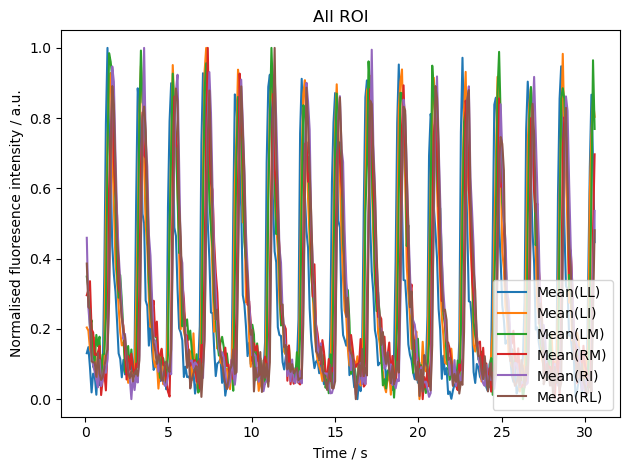

In [10]:
fig, ax = plt.subplots()

for col in norm_data:
    x = norm_data[col].index * sec_per_frame
    y = norm_data[col].values
    ax.plot(x, y, label=col)

ax.set_title('All ROI')
ax.set_xlabel('Time / s')
ax.set_ylabel('Normalised fluoresence intensity / a.u.')

plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(output_dir + 'all_ROI_time_vs_norm_fluor_int-' + cut + '.svg')
plt.show()

### Left ROIs

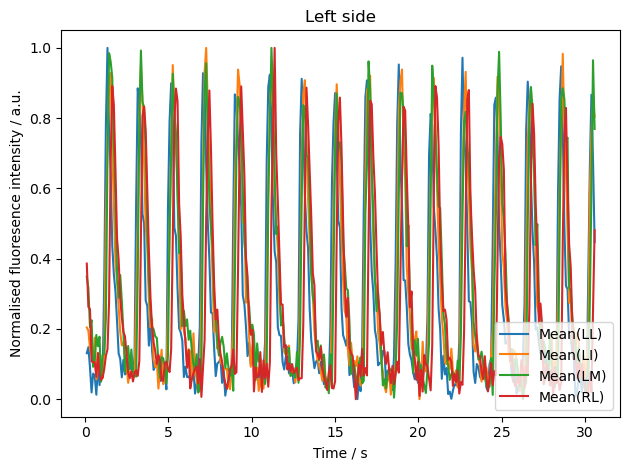

In [11]:
fig, ax = plt.subplots()

for col in norm_data.filter(regex='L'):
    x = norm_data[col].index * sec_per_frame
    y = norm_data[col].values
    ax.plot(x, y, label=col)

ax.set_title('Left side')
ax.set_xlabel('Time / s')
ax.set_ylabel('Normalised fluoresence intensity / a.u.')

plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(output_dir + 'left_side_time_vs_norm_fluor_int-' + cut + '.svg')
plt.show()

### Right ROIs

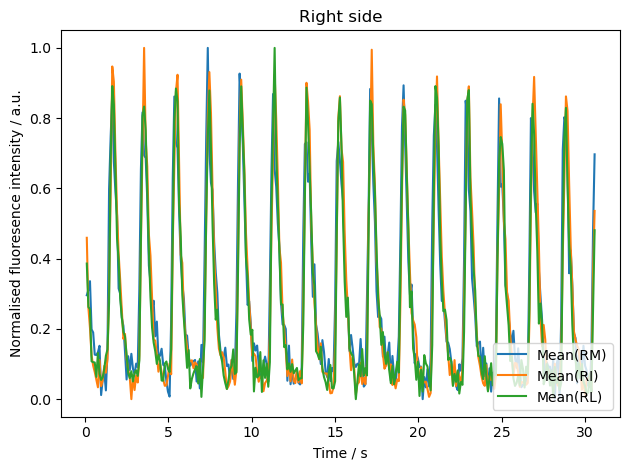

In [12]:
fig, ax = plt.subplots()

for col in norm_data.filter(regex='R'):
    x = norm_data[col].index * sec_per_frame
    y = norm_data[col].values
    ax.plot(x, y, label=col)

ax.set_title('Right side')
ax.set_xlabel('Time / s')
ax.set_ylabel('Normalised fluoresence intensity / a.u.')

plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(output_dir + 'right_side_time_vs_norm_fluor_int-' + cut + '.svg')
plt.show()

## Peak finding

### Calculate left beat frequency

- Add functionality to define time window, default = all time

Peaks found (index) = [ 15  34  54  75  95 116 137 157 178 198 218 238 258 279 299]
Peaks found (frame number) = [ 16  35  55  76  96 117 138 158 179 199 219 239 259 280 300]


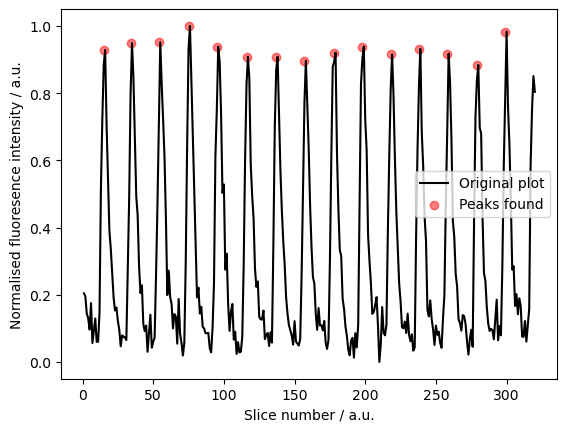

In [13]:
height = 150
prominence = 0.5
distance = 4

mean_LI = norm_data['Mean(LI)']

peaks_LI, info = find_peaks(
    x=mean_LI,
    prominence=prominence,
)

x = list(range(1, len(mean_LI)+1))
y = mean_LI

print(f'Peaks found (index) = {peaks_LI}')
print(f'Peaks found (frame number) = {np.array(x)[peaks_LI]}')

fig, ax = plt.subplots()

ax.plot(x, y, c='k', label='Original plot')
ax.scatter(peaks_LI, np.array(y)[peaks_LI], c='red', alpha=0.5, label='Peaks found')

ax.set_xlabel('Slice number / a.u.')
ax.set_ylabel('Normalised fluoresence intensity / a.u.')

plt.legend()
plt.show()

In [14]:
left_num_peaks = len(peaks_LI)
print(f'Number of peaks found = {left_num_peaks}')
L_freq = left_num_peaks / abs_time
print(f'{L_freq = } Hz')

Number of peaks found = 15
L_freq = 0.4905166775670373 Hz


### Calculate right beat frequency

Peaks found (index) = [ 16  36  57  77  97 118 138 159 179 199 220 240 260 281 301]
Peaks found (frame number) = [ 17  37  58  78  98 119 139 160 180 200 221 241 261 282 302]


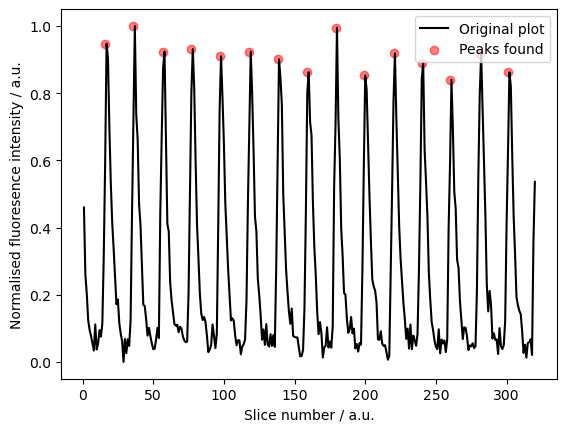

In [15]:
height = 150
prominence = 0.5
distance = 4

mean_RI = norm_data['Mean(RI)']

peaks_RI, info = find_peaks(
    x=mean_RI,
    prominence=prominence,
)

x = list(range(1, len(mean_RI)+1))
y = mean_RI

print(f'Peaks found (index) = {peaks_RI}')
print(f'Peaks found (frame number) = {np.array(x)[peaks_RI]}')

fig, ax = plt.subplots()

ax.plot(x, y, c='k', label='Original plot')
ax.scatter(peaks_RI, np.array(y)[peaks_RI], c='red', alpha=0.5, label='Peaks found')

ax.set_xlabel('Slice number / a.u.')
ax.set_ylabel('Normalised fluoresence intensity / a.u.')

plt.legend()
plt.show()

Hz = $s^{-1}$

In [16]:
right_num_peaks = len(peaks_RI)
print(f'Number of peaks found = {right_num_peaks}')
R_freq = right_num_peaks / abs_time
print(f'{R_freq = } Hz')

Number of peaks found = 15
R_freq = 0.4905166775670373 Hz


### Mean Frequency and/or mean peak-to-peak interval + SD

### $t_{1/2}$ (time to reach 0.5 normalised intensity) for each ROI

- Up wave: odd-numbered columns
- Down wave: even-numbered columns
- Average $t_{1/2}$ values
- `if y == 0.5`

In [17]:
def calc_t_half(
    y_data: pandas.Series,
    cut: str,
    prominence: float = 0.5,
    rel_height: float = 0.95,
    kind: str = 'cubic',
    show_fig: bool = True,
    title: any = None,
) -> numpy.ndarray:
    """Calculates the t_half of the upbeat only by finding the peak and left base of a signal before
    the halfway point is interpolated.

    Args:
        y_data (pandas.Series): Fluoresence data containing signals.
        cut (str): Precut or postcut.
        prominence (float, optional): As described by scipy.signal.find_peaks documentation. Defaults to 0.5.
        rel_height (float, optional): As described by scipy.signal.peak_widths documentation. Defaults to 0.95.
        kind (str, optional): As described by scipy.interpolate.interp1d. Defaults to 'cubic'.
        show_fig (bool, optional): Option to show and save a visual validation. Defaults to True.
        title (any, optional): Used as the figure super title and image save filename. Defaults to None.

    Raises:
        ValueError: If number of peaks found does not match number of left bases found

    Returns:
        numpy.ndarray: t_half values
    """

    # Extract x values from index and y from values.
    # Save as numpy arrays
    x_np = y_data.index.to_numpy()
    y_np = y_data.values

    # Find peaks of signals
    peaks, _ = find_peaks(
        x=y_data,
        prominence=prominence,
    )
    # Number of peaks found
    num_peaks = len(peaks)

    # Find left and right bases of signals
    widths = peak_widths(
        y_data, peaks,
        rel_height=rel_height,
    )
    # Left bases have index of 2
    # Turn float into int
    left_bases = widths[2].astype(int)
    # Number of left bases found
    num_left_bases = len(left_bases)

    # Check if number of peaks found matches number of left bases found
    if num_peaks != num_left_bases:
        raise ValueError(
            f'''
            Number of peaks found ({num_peaks}) does not match numberof left bases found ({num_left_bases}).
            Try changing prominence and rel_height arguements.
            '''
        )

    if show_fig:

        # Setup figure to visualise result
        fig, ax = plt.subplots(
            2, 2,
            sharex=True,
            sharey=True,
        )

        # Formatting for linewidth (lw), size (s) and markersize (s)
        lw, s, ms = 1, 15, 5

        # Plot original time vs normalised fluoresence intensity
        ax[0, 0].set_title('Original plot')
        for i, j in zip([0, 0, 1], [0, 1, 1]):
            ax[i, j].plot(real_time(x_np), y_np, c='k', lw=lw, label='Original plot')

        # Plot left bases and peaks
        ax[0, 1].set_title('Left bases and peaks')
        ax[0, 1].scatter(real_time(x_np[peaks]), y_np[peaks], c='darkblue', marker='*', s=s)
        ax[0, 1].scatter(real_time(x_np[left_bases]), y_np[left_bases], c='darkblue', marker='^', s=s)

    # Empty lists for t_half x and y coordinates
    x_halfs, y_halfs = [], []
    x_winds, y_winds = [], []

    # Loop over the indexes at which the left bases and peaks are found
    for left_base_ind, peak_ind in zip(left_bases, peaks):

        # Define the x and y windows to calculate the t_half from
        # Slice by the left base and peak indexes to get the corresponding x and y values
        x_wind = x_np[left_base_ind:peak_ind+1]
        y_wind = y_np[left_base_ind:peak_ind+1]

        # plt.plot(x_wind, y_wind, marker='o')

        # Calculate the half way point of the y window
        y_half = (y_wind.max() + y_wind.min()) / 2

        # Define interpolation function trained on y and x windows
        # Such that frame number is a function of the fluoresence intensity
        # frame number = f(fluoresence intensity)
        f = interp1d(y_wind, x_wind, kind)
        x_half = f(y_half)

        # Append results
        x_halfs.append(x_half)
        y_halfs.append(y_half)
        x_winds.append(x_wind)
        y_winds.append(y_wind)

    # Convert list to numpy.ndarray and broadcast multiply by seconds per frame
    x_halfs_np = np.array(x_halfs)
    x_halfs_sec = real_time(x_halfs_np)

    if show_fig:

        # Plot ubbeats only showing data points
        ax[1, 0].set_title('Upbeats')
        for x_wind, y_wind in zip(x_winds, y_winds):
            ax[1, 0].plot(real_time(x_wind), y_wind, lw=lw, color='k', marker='.', ms=ms)

        # Plot position of t_half
        ax[1, 1].set_title('$t_{1/2}$')
        ax[1, 1].scatter(x_halfs_sec, y_halfs, c='red', marker='x', s=s)

        # Figure formatting
        fig.suptitle(f'{cut.title()} {title}')
        fig.supxlabel('Time / s')
        fig.supylabel('Normalised fluoresence intensity / a.u.')
        plt.tight_layout()
        plt.savefig(output_dir + 't_half_calc-' + cut + '-' + title + '.svg')
        plt.show()

    return x_halfs_sec

## Right

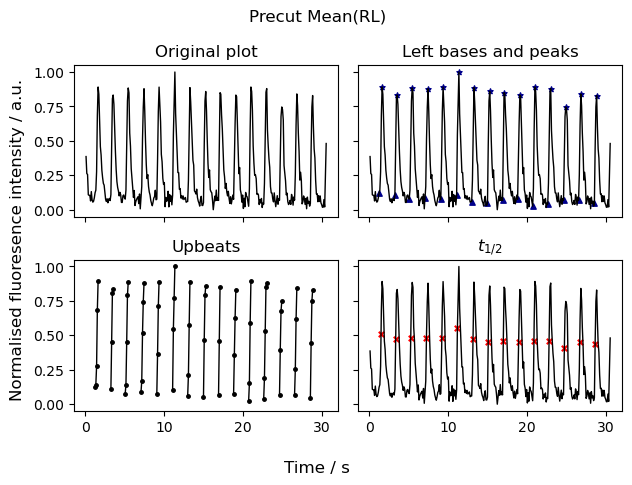

RL_t_halfs = array([ 1.45070231,  3.33819051,  5.25764717,  7.25622284,  9.20341448,
       11.18386932, 13.16568867, 15.0976304 , 17.01000006, 18.95355776,
       20.9077187 , 22.84805455, 24.75248814, 26.71617413, 28.66732911])


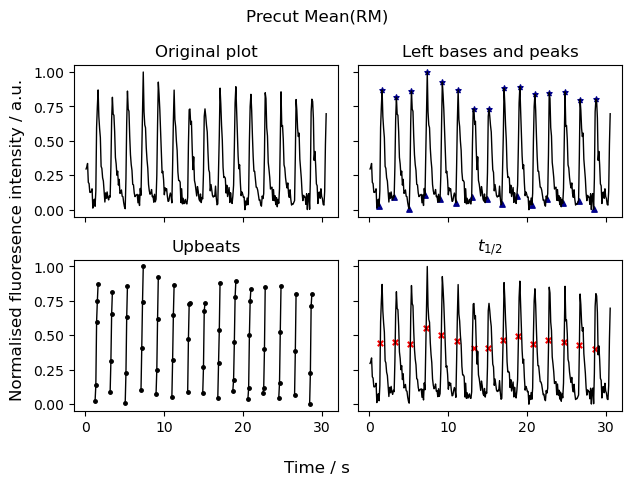

RM_t_halfs = array([ 1.39279511,  3.28611902,  5.21023273,  7.20792973,  9.14754023,
       11.12410159, 13.30389943, 15.00495262, 16.98240441, 18.9285007 ,
       20.82578741, 22.73628189, 24.73918583, 26.67501667, 28.59112623])

Results:

R_delta_t_halfs = array([-0.0579072 , -0.05207148, -0.04741444, -0.04829311, -0.05587425,
       -0.05976773,  0.13821076, -0.09267778, -0.02759565, -0.02505706,
       -0.08193129, -0.11177266, -0.01330231, -0.04115746, -0.07620287])

R_mean = -0.04
R_std = 0.05

medial -> lateral


In [18]:
# Mean RL
subset = 'Mean(RL)'
RL_t_halfs = calc_t_half(
    y_data=norm_data[subset],
    cut=cut,
    prominence=0.5,
    rel_height=0.9,
    kind='quadratic',
    show_fig=True,
    title=subset,
)
print(f'{RL_t_halfs = }')

# Mean RM
subset = 'Mean(RM)'
RM_t_halfs = calc_t_half(
    y_data=norm_data[subset],
    cut=cut,
    prominence=0.5,
    rel_height=0.9,
    kind='quadratic',
    show_fig=True,
    title=subset,
)
print(f'{RM_t_halfs = }')

print('\nResults:\n')

R_delta_t_halfs = RM_t_halfs - RL_t_halfs
print(f'{R_delta_t_halfs = }\n')
R_mean = round(R_delta_t_halfs.mean(), dp)
R_std = round(R_delta_t_halfs.std(), dp)
print(f'{R_mean = }')
print(f'{R_std = }')

print()
if R_mean > 0:
    R_res = 'lateral -> medial'
else:
    R_res = 'medial -> lateral'
print(R_res)

## Left

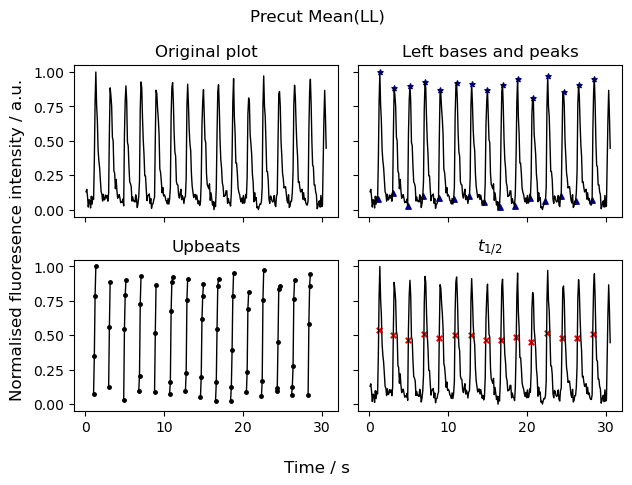

LL_t_halfs = array([ 1.18596188,  3.04365491,  4.94879354,  6.94863866,  8.87680937,
       10.91268543, 12.85927315, 14.77614022, 16.72145716, 18.65352514,
       20.58542306, 22.53229608, 24.42983797, 26.41081545, 28.36805931])


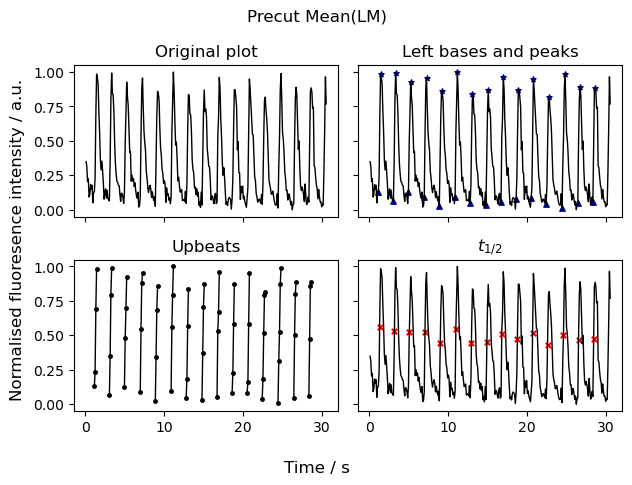

LM_t_halfs = array([ 1.32296417,  3.18923756,  5.08243945,  7.06942469,  9.0070398 ,
       10.98401481, 12.97042594, 14.92685313, 16.80439806, 18.80214243,
       20.73325413, 22.6522383 , 24.64641483, 26.56101209, 28.47855352])

Results:

L_delta_t_halfs = array([0.13700229, 0.14558265, 0.13364591, 0.12078603, 0.13023043,
       0.07132938, 0.11115279, 0.15071292, 0.0829409 , 0.14861729,
       0.14783106, 0.11994221, 0.21657685, 0.15019663, 0.1104942 ])

L_mean = 0.13
L_std = 0.03

lateral -> medial


In [19]:
# Mean LL
subset = 'Mean(LL)'
LL_t_halfs = calc_t_half(
    y_data=norm_data[subset],
    cut=cut,
    prominence=0.5,
    rel_height=0.9,
    kind='quadratic',
    show_fig=True,
    title=subset,
)
print(f'{LL_t_halfs = }')

# Mean LM
subset = 'Mean(LM)'
LM_t_halfs = calc_t_half(
    y_data=norm_data[subset],
    cut=cut,
    prominence=0.5,
    rel_height=0.9,
    kind='quadratic',
    show_fig=True,
    title=subset,
)
print(f'{LM_t_halfs = }')

print('\nResults:\n')

L_delta_t_halfs = LM_t_halfs - LL_t_halfs
print(f'{L_delta_t_halfs = }\n')
L_mean = round(L_delta_t_halfs.mean(), dp)
L_std = round(L_delta_t_halfs.std(), dp)
print(f'{L_mean = }')
print(f'{L_std = }')

print()
if L_mean > 0:
    L_res = 'lateral -> medial'
else:
    L_res = 'medial -> lateral'
print(L_res)

## Overall

In [20]:
print(f'Left: {L_res} ---> right: {R_res}')
print(f'Left: {L_mean} +/- {L_std} ---> right: {R_mean} +/- {R_std}')

Left: lateral -> medial ---> right: medial -> lateral
Left: 0.13 +/- 0.03 ---> right: -0.04 +/- 0.05


## LI and RI plot

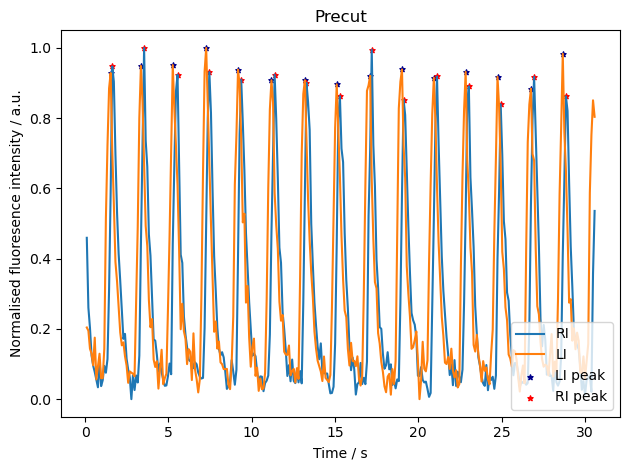

delta = RI - LI
delta_peak_time_mean = 0.17
delta_peak_time_std = 0.05


In [21]:
def get_peaks(y_data):
    # Find peaks of signals
    peaks, _ = find_peaks(
        x=y_data,
        prominence=prominence,
    )

    return peaks


LI = norm_data['Mean(LI)']
RI = norm_data['Mean(RI)']

x_np = LI.index.to_numpy()
y_LI = LI.values
y_RI = RI.values
peaks_LI = get_peaks(y_LI)
peaks_RI = get_peaks(y_RI)

if len(peaks_LI) != len(peaks_RI):
    raise ValueError(f'peaks_LI ({peaks_LI}) and peaks_RI ({peaks_RI}) are different lengths.')

fig, ax = plt.subplots()
lw, s, ms = 1, 15, 5

ax.plot(real_time(x_np), y_RI, label='RI')
ax.plot(real_time(x_np), y_LI, label='LI')

ax.scatter(real_time(x_np[peaks_LI]), y_LI[peaks_LI], c='darkblue', marker='*', s=s, label='LI peak')
ax.scatter(real_time(x_np[peaks_RI]), y_RI[peaks_RI], c='red', marker='*', s=s, label='RI peak')

ax.set_title(f'{cut.title()}')
ax.set_xlabel('Time / s')
ax.set_ylabel('Normalised fluoresence intensity / a.u.')

plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(output_dir + 'RI_peaks_minus_LI_peaks-' + cut + '.svg')
plt.show()

delta_time = real_time(x_np[peaks_RI]) - real_time(x_np[peaks_LI])
delta_peak_time_mean = round(delta_time.mean(), dp)
delta_peak_time_std = round(delta_time.std(), dp)
print('delta = RI - LI')
print(f'{delta_peak_time_mean = }')
print(f'{delta_peak_time_std = }')

### Write results to CSV

- Add columns that specifiy whether pre-cut, post-cut etc.